In [383]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1 : Does having a PhD really make you make more money (in the tech field)?

    Step 1: I divide the *Formal Education column* based on whether they have a PhD.
        There are two groups: PhD and something else



<AxesSubplot:>

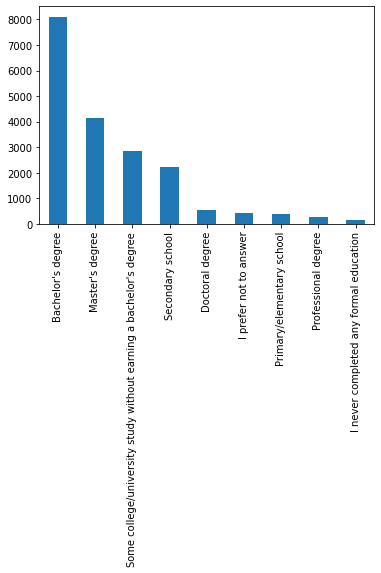

In [384]:
df['FormalEducation'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='FormalEducation'>

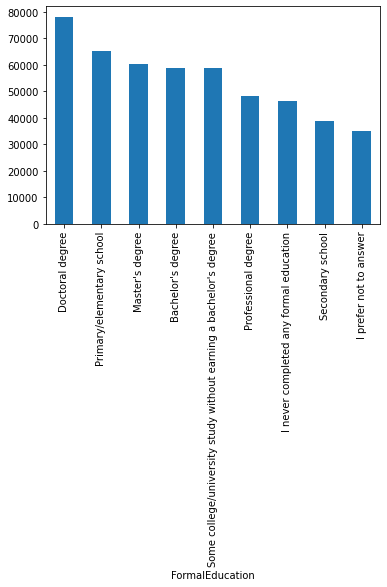

In [385]:
df.groupby(['FormalEducation']).mean()['Salary'].sort_values(ascending=False).plot(kind='bar')

In [386]:
def higher_ed(formal_ed):
    '''
    INPUT
        formal_ed - a string from the Formal Education column
    
    OUTPUT
        return 1 if the string is 'Doctoral degree'
        return 0 otherwise
    '''
    if formal_ed == "Doctoral degree":
        return 1
    else:
        return 0

df['FormalEducation'].apply(higher_ed)[:5]

0    0
1    0
2    0
3    1
4    0
Name: FormalEducation, dtype: int64

    Step 2: create a new column *HigherEd* according to the step 1's result

In [387]:
df['HigherEd'] = df['FormalEducation'].apply(higher_ed)
PhD = df[df['HigherEd'] == 1]
N_PhD = df[df['HigherEd'] == 0]

edu_proportion = df['HigherEd'].value_counts()/df.shape[0]
edu_proportion

0    0.971155
1    0.028845
Name: HigherEd, dtype: float64

    Step 3: find the corresponding average salaries for each group and run a hypothesis testing

In [388]:
PhD_salary = PhD['Salary'].dropna()
print(PhD_salary.mean())

78174.12138887265


In [389]:
N_PhD_salary = N_PhD['Salary'].dropna()
print(N_PhD_salary.mean())

57792.072025540314


dict_keys(['PhD Salary', 'None PhD Salary'])


Text(0.5, 1.0, 'Salary comparison')

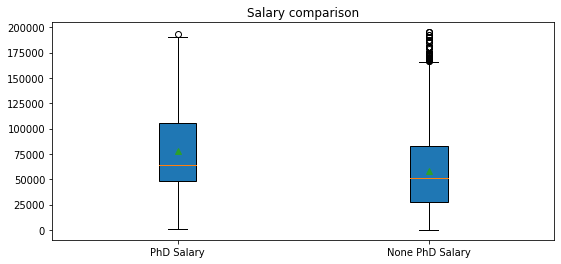

In [390]:
salary = {'PhD Salary':PhD_salary, 'None PhD Salary':N_PhD_salary}
labels = salary.keys()
print(labels)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4))

bplot = ax.boxplot(salary.values(),
                   vert= True,
                  patch_artist=True,
                  labels = labels,
                  showmeans = True)
ax.set_title('Salary comparison')

Null hypothesis testing, t-test and p-value

In [391]:
stats.ttest_ind(PhD_salary, N_PhD_salary, equal_var = False)

Ttest_indResult(statistic=5.490877740149919, pvalue=1.8116761446575578e-07)

### Question 2:  Are PhDs more likely working in big companies ?

<AxesSubplot:>

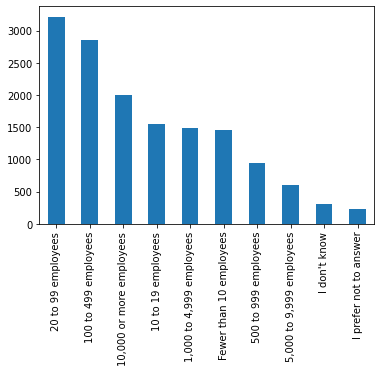

In [392]:
df['CompanySize'].value_counts().plot(kind='bar')

    Step 1: divide companies into big and small companies, 500 is the threshold

In [393]:
def companySize(company_size):
    '''
    INPUT
        companySize - a string from the CompanySize column
    
    OUTPUT
        return 1 if the number of empolyees is greater than and equal to 500
        return 0 otherwise
    '''
    if company_size in ("500 to 999 employees","1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees"):
        return 1
    else:
        return 0

df['CompanySize'].apply(companySize)[:5]

0    0
1    0
2    1
3    1
4    0
Name: CompanySize, dtype: int64

In [394]:
df['LargeCompany'] = df['CompanySize'].apply(companySize)
LC = df[df['LargeCompany'] == 1]
SC = df[df['LargeCompany'] == 0]

The number of PhDs in large companies vs in small companies

In [395]:
LC['HigherEd'].value_counts()

0    4809
1     223
Name: HigherEd, dtype: int64

In [396]:
SC['HigherEd'].value_counts()

0    13742
1      328
Name: HigherEd, dtype: int64

Large company PhD salary vs. small company PhD salary

In [308]:
LC_PhD_salary = LC[LC['HigherEd'] == 1]['Salary'].dropna()

In [309]:
SC_PhD_salary = SC[SC['HigherEd'] == 1]['Salary'].dropna()

In [310]:
SC.groupby('HigherEd').mean()['Salary']

HigherEd
0    52587.293606
1    70272.133834
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary comparison')

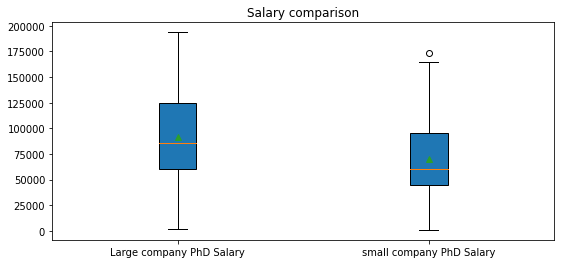

In [311]:
LS_salary = {'Large company PhD Salary':LC_PhD_salary, 'small company PhD Salary':SC_PhD_salary}
labels = LS_salary.keys()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4))

bplot = ax.boxplot(LS_salary.values(),
                   vert= True,
                  patch_artist=True,
                  labels = labels,
                  showmeans = True)
ax.set_title('Salary comparison')

### Question 3: What factors are associated with high salary?

Step 1: clean data, get rid of NANs

In [322]:
def clean_data(df, response_col):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=[response_col], axis=0)
    y = df[response_col]
    
    #Drop respondent, expected salary, and response columns
    df = df.drop(['Respondent', 'ExpectedSalary', response_col], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df, 'Salary')    

Step 2: train Random forest regression and fit model

In [340]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Algorithm
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score =True,
                           bootstrap = True,
                           random_state= 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 0.95 
OOB Score: 0.65 
R^2 Validation Score: 0.67


Step 3: find the most important features

Text(0.5, 0, 'Random Forest Feature Importance')

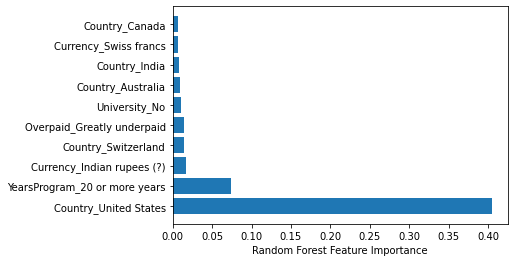

In [374]:
sorted_idx = rf.feature_importances_.argsort()[::-1]
partial_idx = sorted_idx[:10]
plt.barh(X.columns[partial_idx], rf.feature_importances_[partial_idx])
plt.xlabel("Random Forest Feature Importance")